In [4]:
%matplotlib notebook

#Hello!

Output()

<IPython.core.display.Javascript object>


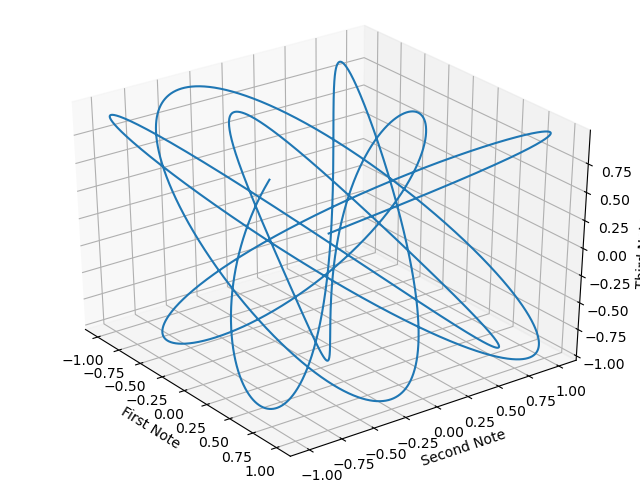

In [12]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

x_note = widgets.IntSlider(value=0, description='First note', max=12, min=0)
y_note = widgets.IntSlider(value=4, description='Second note', max=12, min=0)
z_note = widgets.IntSlider(value=7, description='Third note', max=12, min=0)

form = widgets.HBox([x_note, y_note, z_note])
x_audio = widgets.Output()
y_audio = widgets.Output()
z_audio = widgets.Output()

display(ipd.Markdown('#Hello!'))
display(form)
audio = widgets.HBox([x_audio, y_audio, z_audio])
out = widgets.Output()
with out:
    display(audio)

def generate_audio(wave_array, sr=44100):
    return ipd.Audio(wave_array, rate=sr)

def note_eventhandler(change):
    x, y, z, x_w, y_w, z_w = iterative_wave()
    ax.cla()
    
    out.clear_output(wait=True)
    
    x_audio = widgets.Output()
    y_audio = widgets.Output()
    z_audio = widgets.Output()
    x_audio.append_display_data(ipd.Audio(x_w, rate=44100))
    y_audio.append_display_data(ipd.Audio(y_w, rate=44100))
    z_audio.append_display_data(ipd.Audio(z_w, rate=44100))
    audio = widgets.HBox([x_audio, y_audio, z_audio])
    chord = ipd.Audio(x_w + y_w + z_w, rate=44100)
    chord_audio = widgets.Output()
    chord_audio.append_display_data(chord)
    with out:
        display(audio)
        print("The chord!")
        display(chord)
        ax.set_xlabel('First Note')
        ax.set_ylabel('Second Note')
        ax.set_zlabel('Third Note')
        ax.plot(x, y, z)
    
x_note.observe(note_eventhandler, names='value')
y_note.observe(note_eventhandler, names='value')
z_note.observe(note_eventhandler, names='value')

def visual_wave(interval):
    t = np.linspace(0, 4, 44100)
    return np.sin(2 * np.pi * t * (1.0595**interval))
    
def audio_wave(interval):
    t = np.linspace(0, 4, 44100)
    return np.sin(0.25 * np.pi * t * 440 * (1.0595**interval))

def iterative_wave():
    root = x_note.value
    third = y_note.value
    fifth = z_note.value
    x, y, z = list(map(visual_wave, [root, third, fifth]))
    x_audio, y_audio, z_audio = list(map(audio_wave, [root, third, fifth]))
    return x, y, z, x_audio, y_audio, z_audio

x, y, z, x_w, y_w, z_w = iterative_wave()

display(out)
fig = plt.figure()
fig.set_label('Chord visualization')
ax = Axes3D(fig)
ax.set_xlabel('First Note')
ax.set_ylabel('Second Note')
ax.set_zlabel('Third Note')
ax.plot(x, y, z)